In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
import numpy as np
import sys
sys.path.append('/home/hrushikesh/')
from torch_functions import *
import foolbox as fb

In [6]:
batch_size = 40
aug = transforms.RandomChoice((transforms.RandomHorizontalFlip(p=1), transforms.RandomCrop(32, padding=4)))

train_transforms = transforms.Compose([aug, transforms.ToTensor()])
test_transforms = transforms.Compose([transforms.ToTensor()])

cifar_train = datasets.CIFAR10("/home/hrushikesh/torch/data", train=True, download=True, transform=train_transforms)
cifar_test = datasets.CIFAR10("/home/hrushikesh/torch/data", train=False, download=True, transform=test_transforms)

train_loader = DataLoader(cifar_train, batch_size = batch_size, shuffle=True)
test_loader = DataLoader(cifar_test, batch_size = batch_size, shuffle=False)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#device = 'cpu'
print(device)


Files already downloaded and verified
Files already downloaded and verified
cuda


In [7]:
X, y = next(iter(test_loader))
print(y)
print(X.shape)

tensor([3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6, 7, 0, 4, 9,
        5, 2, 4, 0, 9, 6, 6, 5, 4, 5, 9, 2, 4, 1, 9, 5])
torch.Size([40, 3, 32, 32])


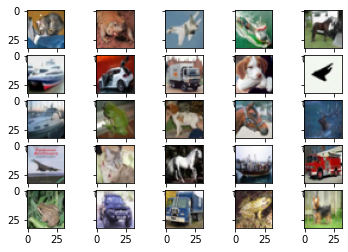

In [8]:
import matplotlib.pyplot as plt
f,ax = plt.subplots(5,5, sharey=True)
for i in range(25):
    ax[i%5][i//5].imshow(X[i].numpy().transpose(1, 2, 0))
    ax

    

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


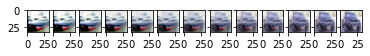

In [12]:
img_1 = X[1] 
img_2 = X[9]

f,ax = plt.subplots(1,13, sharey=True)
for i in np.arange(-3, 10, 1):
    ax[i + 3].imshow((img_1 + ((i/10) * (img_2 - img_1))).numpy().transpose(1, 2, 0))
    ax

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


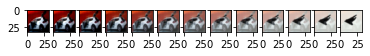

In [14]:
img_1 = X[6] 
img_2 = X[21]

f,ax = plt.subplots(1,13, sharey=True)
for i in np.arange(-3, 10, 1):
    ax[i + 3].imshow((img_1 + ((i/10) * (img_2 - img_1))).numpy().transpose(1, 2, 0))
    ax

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


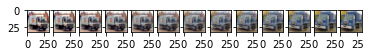

In [15]:
img_1 = X[11] 
img_2 = X[14]

f,ax = plt.subplots(1,13, sharey=True)
for i in np.arange(-3, 10, 1):
    ax[i + 3].imshow((img_1 + ((i/10) * (img_2 - img_1))).numpy().transpose(1, 2, 0))
    ax